<a href="https://colab.research.google.com/github/scarebats/Machine-Learning-2025/blob/main/JS04_2341720047_AHMAD_NAUFAL_ILHAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **JOBSHEET 4**
# **PRAKTIKUM 1**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Persiapan data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine_Learning_25/Iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Seleksi Fitur

X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

display(X)
display(y)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


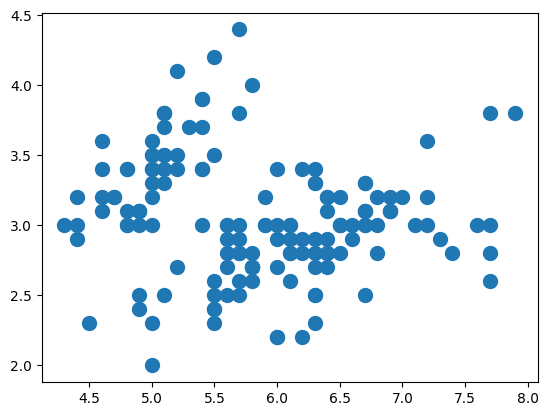

In [6]:
# Plot Data
# Karena data 4 dimensi, maka akan kita coba
# plot cluster berdasarkan Sepal Length dan Sepal Width  saja

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

In [7]:
# Buat Model KMeans
# Kali ini kita coba menggunakan k=2 - anggap saja kita tidak tahu jumlah label ada 3 :)

from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

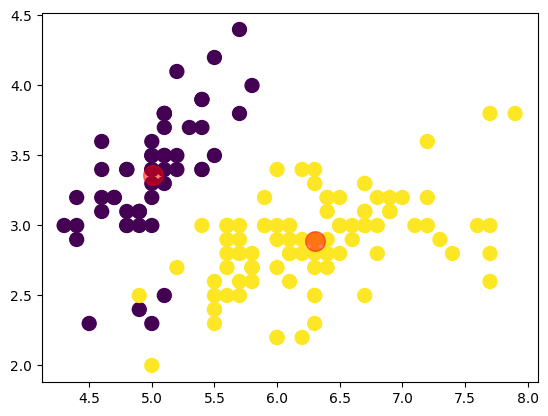

In [8]:
# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [9]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733915


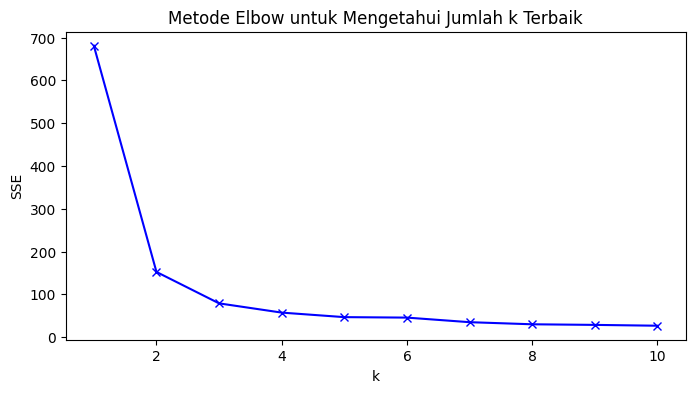

In [10]:
# Implementasi Metode Elbow

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,11)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

In [11]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=680.8243999999996
k=2; SSE=152.36870647733915
k=3; SSE=78.94084142614601
k=4; SSE=57.34540931571815
k=5; SSE=46.78482573099418
k=6; SSE=45.68202151067323
k=7; SSE=34.98311005821878
k=8; SSE=30.071651126651133
k=9; SSE=28.659162322026116
k=10; SSE=26.72169011604339


# **PRAKTIKUM 2**

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

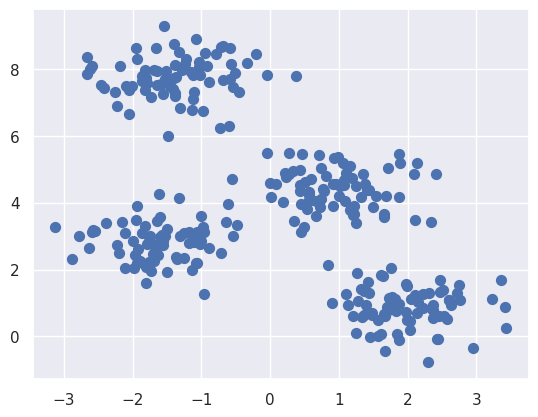

In [13]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

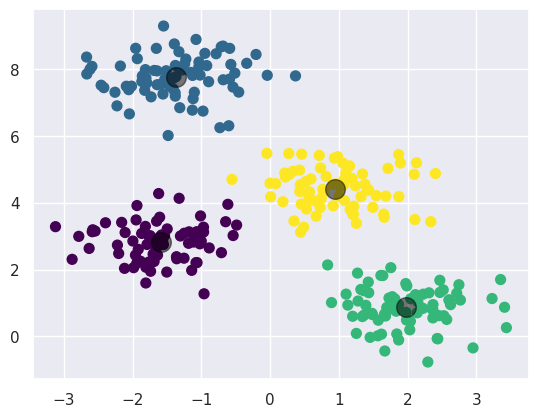

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

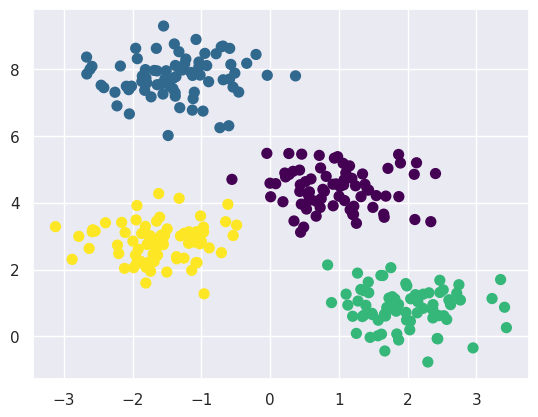

In [16]:
# Algoritma Expectation-Maximization
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. input label center yang baru
        labels = pairwise_distances_argmin(X, centers)

        # 2b. update center dari titik baru
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. cek konvergensi
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

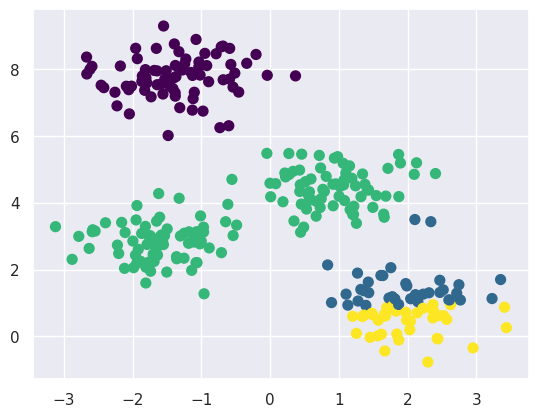

In [17]:
# Perubahan random
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

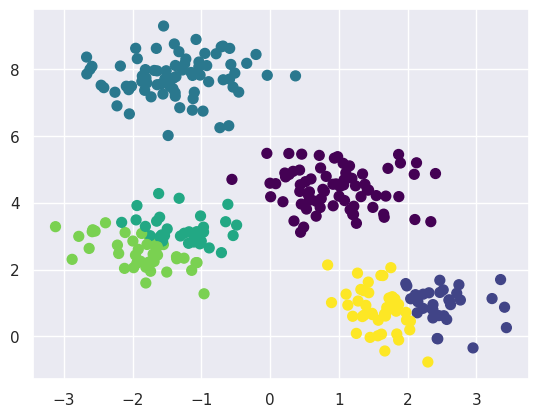

In [18]:
# Optimalisasi Jumlah Klaster
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

In [19]:
# Batas Klaster yang Tidak Selalu Linier
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

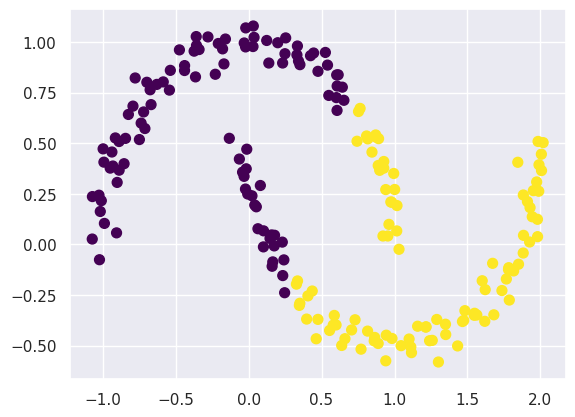

In [20]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


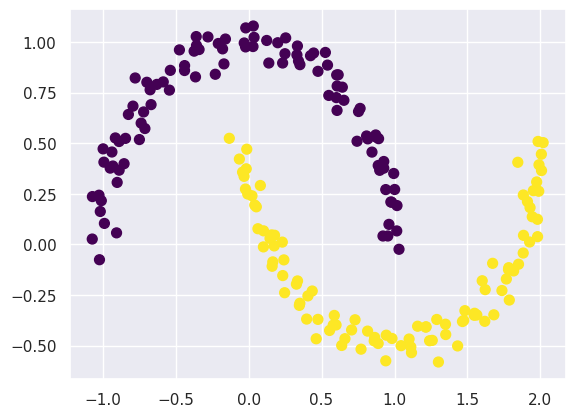

In [21]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

Contoh Kasus 1: Karakter Angka

In [22]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [23]:
# terapkan K-Means
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

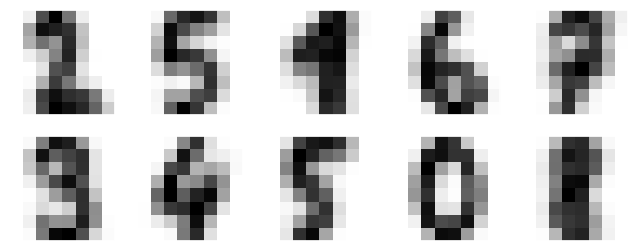

In [24]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [25]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7440178074568725

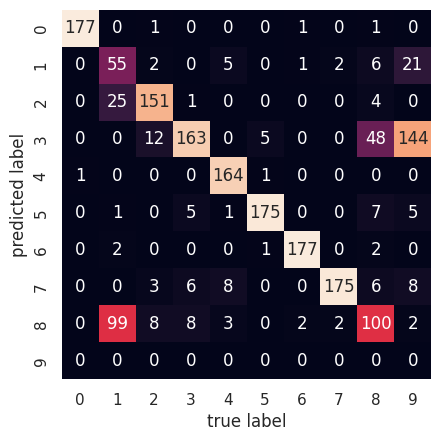

In [27]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [28]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# hitung klaster
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# permutasi label
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# hitung akurasi
accuracy_score(digits.target, labels)

0.9410127991096272

Studi Kasus 2: Kompresi Citra

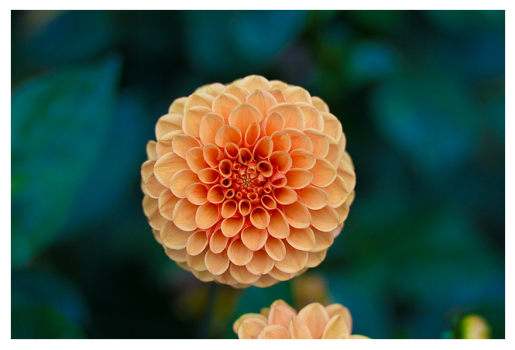

In [29]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

In [30]:
data = flower / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [31]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

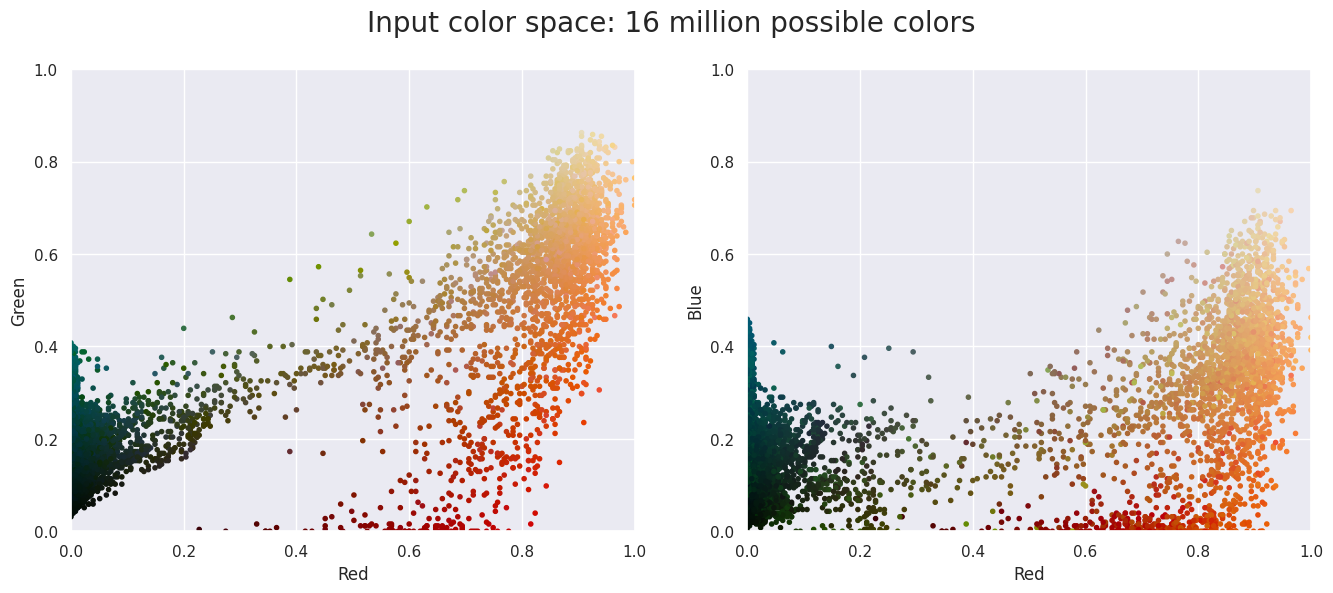

In [32]:
plot_pixels(data, title='Input color space: 16 million possible colors')

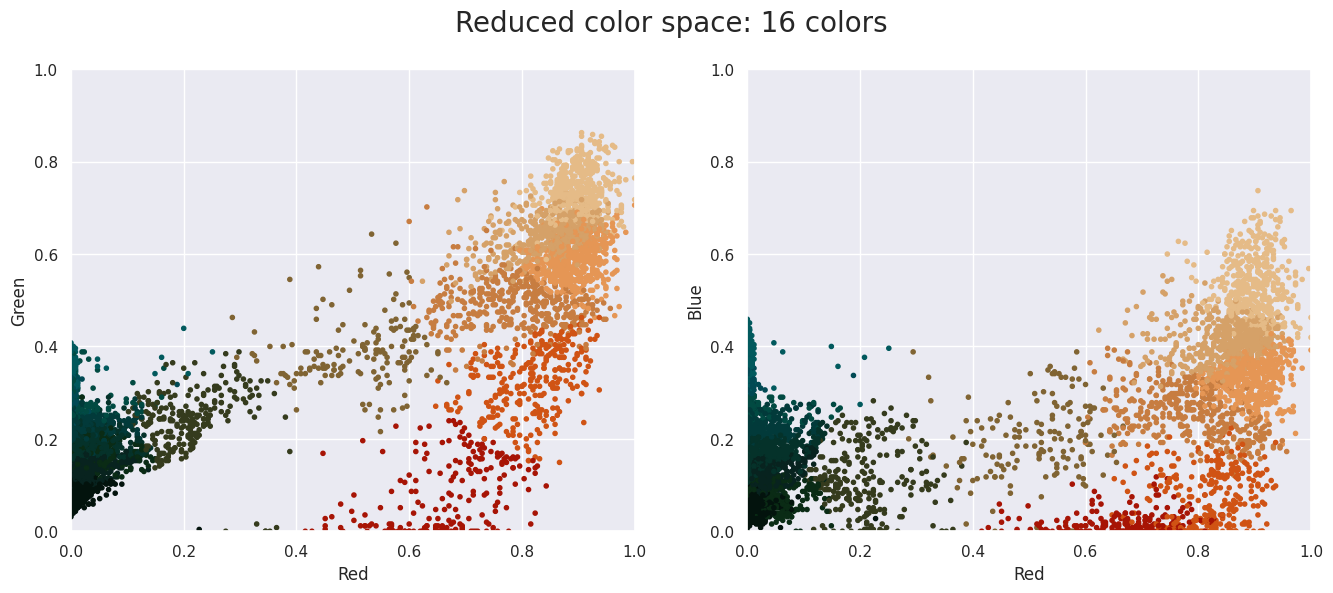

In [33]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

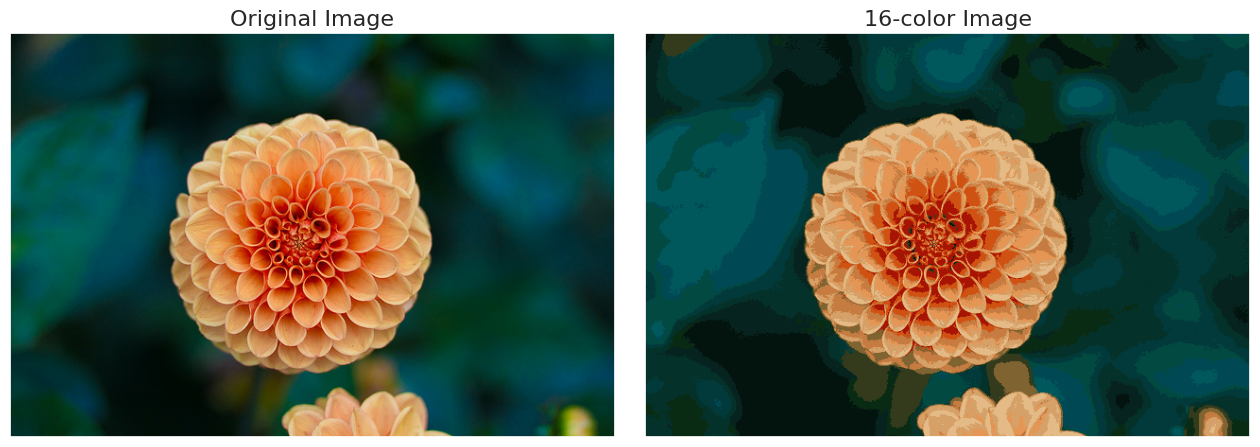

In [34]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

# **PRAKTIKUM 3**

In [35]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=0)

X = StandardScaler().fit_transform(X)

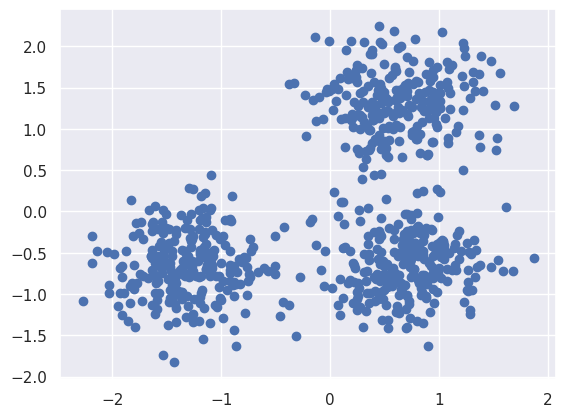

In [36]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])
plt.show()

Compute DBSCAN

In [37]:
import numpy as np

from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 18


Evaluasi Kualitas Klasterisasi

In [38]:
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


Visualisasi Hasil Klasterisasi

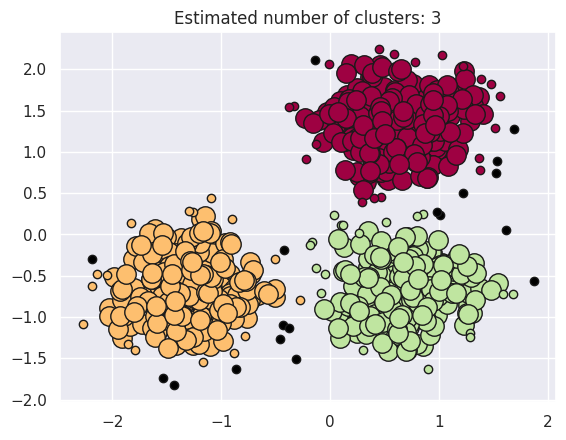

In [39]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

# **TUGAS PRAKTIKUM**
1. Tugas K-Means
Buatlah sebuah model K-Means dengan ketentuan,
- Gunakan data 'Mall_Customers.csv'
- Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)
- Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik.

2. Tugas DBSCAN
- Buat dataset make_moons (1000 sampel, noise=0.05), lalu normalisasi.
- Jalankan DBSCAN dengan eps=0.2, min_samples=5, hitung jumlah klaster & noise.
- Evaluasi dengan metrik: Homogeneity, Completeness, V-measure, ARI, AMI, Silhouette.
- Visualisasikan hasil DBSCAN (core sample = titik besar, non-core = titik kecil, noise = hitam).
- Lakukan eksperimen:
  - eps = 0.05, 0.1, 0.3, 0.5
  - min_samples = 3, 10, 20
  - Catat perubahan klaster, noise, dan kualitas evaluasi.

[Income–Spending] fitur = ['Annual Income (k$)', 'Spending Score (1-100)']
{'silhouette': 5, 'CH': 9, 'DB': 5, 'best_k': 5}
[Age–Spending] fitur = ['Age', 'Spending Score (1-100)']
{'silhouette': 2, 'CH': 10, 'DB': 10, 'best_k': 10}


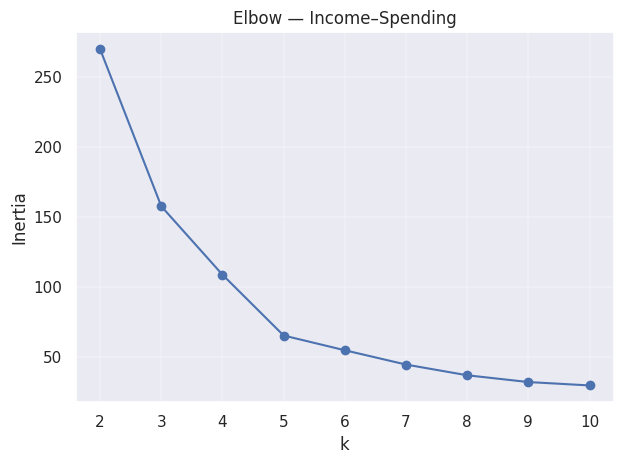

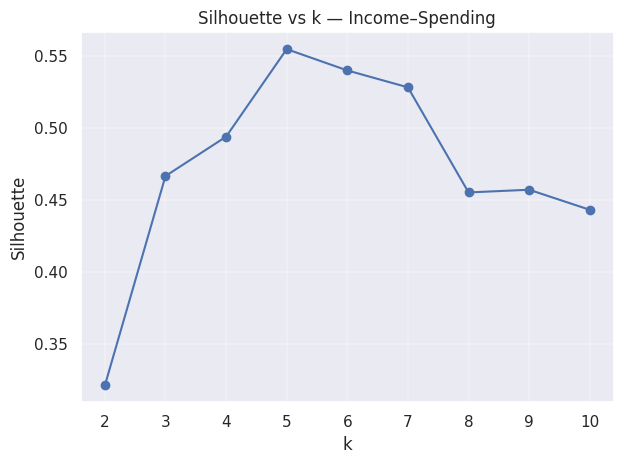

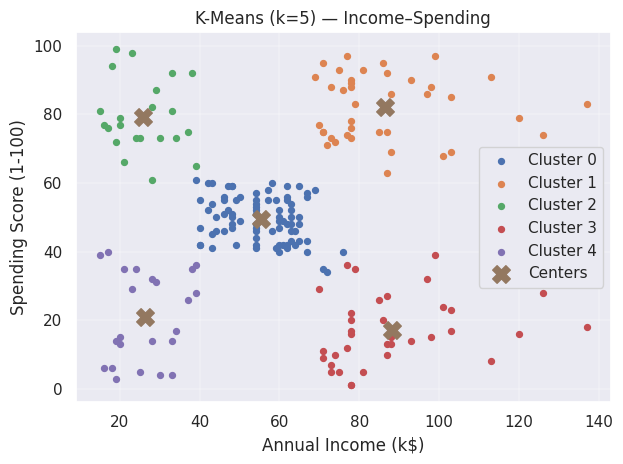

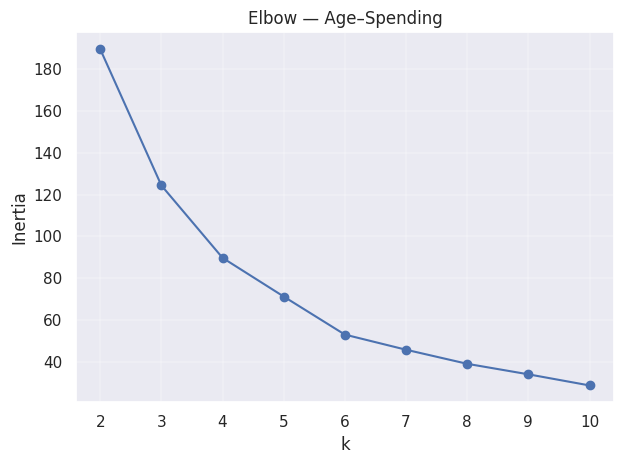

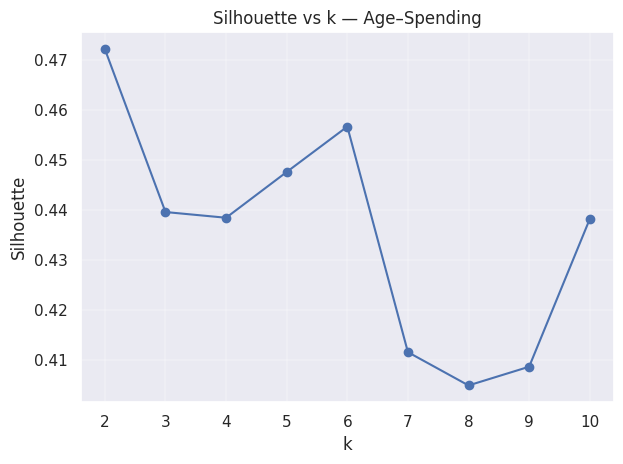

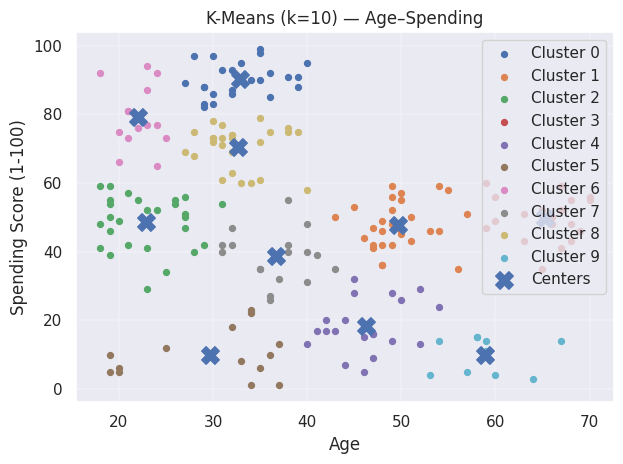

In [41]:
# Soal 1
# Mall Customers dengan melakukan perbandingan 2 set fitur (Income–Spending vs Age–Spending) import re, numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from collections import Counter
import re

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine_Learning_25/Mall_Customers.csv')

# 2) Helper: cari kolom by regex (case-insensitive)
def find_col(df, patterns, default=None):
    for pat in patterns:
        rx = re.compile(pat, re.I)
        for c in df.columns:
            if rx.search(c):
                return c
    return default

# 3) Deteksi kolom utama
income = find_col(df, [r"annual\s*income", r"\bincome\b"], "Annual Income (k$)")
spend  = find_col(df, [r"spending\s*score", r"\bspending\b.*\bscore\b"], "Spending Score (1-100)")
age    = find_col(df, [r"\bage\b"], "Age")

# Fallback jika nama kolom beda
nums = df.select_dtypes(include=[np.number]).columns.tolist()
if income not in df.columns and nums: income = nums[0]
if spend not in df.columns and len(nums) > 1: spend = nums[1]
if age not in df.columns:
    alt = [c for c in nums if c not in {income, spend}]
    age = alt[0] if alt else spend  # fallback aman

# 4) Fungsi evaluasi k untuk 1 set fitur
def evaluate_feature_set(X_orig, k_range=range(2,11), seed=42):
    scaler = StandardScaler()
    X = scaler.fit_transform(X_orig.values)

    inertias, sils, chs, dbs = [], [], [], []
    for k in k_range:
        km = KMeans(n_clusters=k, random_state=seed, n_init=10).fit(X)
        y = km.labels_
        inertias.append(km.inertia_)
        sils.append(silhouette_score(X, y))
        chs.append(calinski_harabasz_score(X, y))
        dbs.append(davies_bouldin_score(X, y))

    k_list = list(k_range)
    k_sil = k_list[int(np.argmax(sils))]
    k_ch  = k_list[int(np.argmax(chs))]
    k_db  = k_list[int(np.argmin(dbs))]

    vote = Counter([k_sil, k_ch, k_db])
    best_k = vote.most_common(1)[0][0]

    # Fit final dan kembali ke satuan asli
    km = KMeans(n_clusters=best_k, random_state=seed, n_init=10).fit(X)
    centers_orig = scaler.inverse_transform(km.cluster_centers_)
    labels = km.labels_

    metrics_df = pd.DataFrame({
        "k": k_list,
        "inertia": inertias,
        "silhouette": sils,
        "calinski_harabasz": chs,
        "davies_bouldin": dbs
    })
    return {
        "metrics": metrics_df,
        "k_sil": k_sil, "k_ch": k_ch, "k_db": k_db, "best_k": best_k,
        "labels": labels, "centers_orig": centers_orig
    }

# 5) dua set fitur
fs1_name, fs1_cols = "Income–Spending", [income, spend]
fs2_name, fs2_cols = "Age–Spending",    [age, spend]

X1 = df[fs1_cols].dropna().copy()
X2 = df[fs2_cols].dropna().copy()

res1 = evaluate_feature_set(X1)
res2 = evaluate_feature_set(X2)

print(f"[{fs1_name}] fitur = {fs1_cols}")
print({"silhouette": int(res1["k_sil"]), "CH": int(res1["k_ch"]), "DB": int(res1["k_db"]), "best_k": int(res1["best_k"])})
print(f"[{fs2_name}] fitur = {fs2_cols}")
print({"silhouette": int(res2["k_sil"]), "CH": int(res2["k_ch"]), "DB": int(res2["k_db"]), "best_k": int(res2["best_k"])})

# 6) Plot untuk setiap set fitur (1 figur per metrik, sesuai aturan)
def plot_elbow(metrics, title_suffix=""):
    plt.figure()
    plt.plot(metrics["k"], metrics["inertia"], marker="o")
    plt.xlabel("k"); plt.ylabel("Inertia"); plt.title(f"Elbow{title_suffix}")
    plt.grid(True, linewidth=0.3); plt.tight_layout(); plt.show()

def plot_sil(metrics, title_suffix=""):
    plt.figure()
    plt.plot(metrics["k"], metrics["silhouette"], marker="o")
    plt.xlabel("k"); plt.ylabel("Silhouette"); plt.title(f"Silhouette vs k{title_suffix}")
    plt.grid(True, linewidth=0.3); plt.tight_layout(); plt.show()

def plot_scatter(X_orig, labels, centers_orig, title_suffix=""):
    plt.figure()
    k = len(np.unique(labels))
    for c in range(k):
        m = (labels == c)
        plt.scatter(X_orig.iloc[m,0], X_orig.iloc[m,1], s=18, label=f"Cluster {c}")
    plt.scatter(centers_orig[:,0], centers_orig[:,1], s=160, marker="X", label="Centers")
    plt.xlabel(X_orig.columns[0]); plt.ylabel(X_orig.columns[1])
    plt.title(f"K-Means (k={k}){title_suffix}")
    plt.legend(); plt.grid(True, linewidth=0.3); plt.tight_layout(); plt.show()

# Income–Spending
plot_elbow(res1["metrics"], f" — {fs1_name}")
plot_sil(res1["metrics"],   f" — {fs1_name}")
plot_scatter(X1, res1["labels"], res1["centers_orig"], f" — {fs1_name}")

# Age–Spending
plot_elbow(res2["metrics"], f" — {fs2_name}")
plot_sil(res2["metrics"],   f" — {fs2_name}")
plot_scatter(X2, res2["labels"], res2["centers_orig"], f" — {fs2_name}")

=== Base run (eps=0.2, min_samples=5) ===
  n_clusters: 2
     n_noise: 0
 homogeneity: 1.0
completeness: 1.0
   v_measure: 1.0
         ARI: 1.0
         AMI: 1.0
  silhouette: 0.3911598537138403


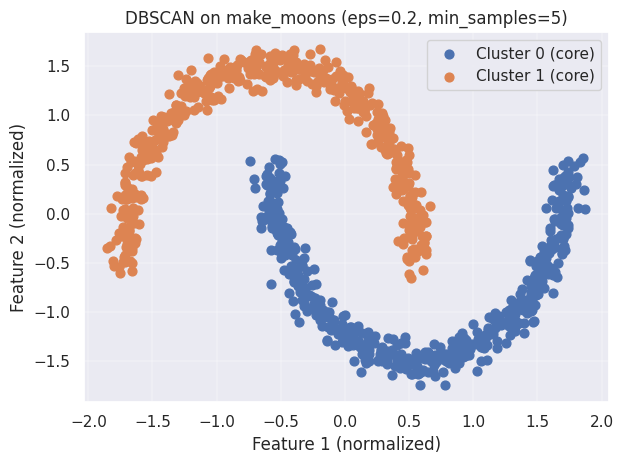


=== Ringkasan eksperimen (diurutkan eps, min_samples) ===
 eps  min_samples  n_clusters  n_noise  homogeneity  completeness  v_measure      ARI      AMI  silhouette
0.05            3          69      186     0.815554      0.152548   0.257021 0.030044 0.243805    0.112929
0.05           10           3      970     0.030669      0.126764   0.049389 0.002283 0.045864   -0.294190
0.05           20           0     1000     0.000000      1.000000   0.000000 0.000000 0.000000         NaN
0.10            3           2       14     0.986207      0.902896   0.942714 0.972179 0.942634    0.251690
0.10           10           7       57     0.943317      0.409546   0.571132 0.523399 0.569801    0.162306
0.10           20           6      850     0.153928      0.155466   0.154693 0.016754 0.150916   -0.360195
0.30            3           2        0     1.000000      1.000000   1.000000 1.000000 1.000000    0.391160
0.30           10           2        0     1.000000      1.000000   1.000000 1.000000

In [42]:
# Soal 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import (
    homogeneity_score, completeness_score, v_measure_score,
    adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
)

# 1) dataset make_moons (1000 sampel, noise=0.05)
X, y_true = make_moons(n_samples=1000, noise=0.05, random_state=42)
scaler = StandardScaler()
Xn = scaler.fit_transform(X)

def run_dbscan(Xn, y_true, eps=0.2, min_samples=5):
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(Xn)
    labels = db.labels_

    unique_labels = set(labels)
    n_clusters = len([l for l in unique_labels if l != -1])
    n_noise = int(np.sum(labels == -1))

    # Metrik berbasis ground-truth (y_true) dan assignment DBSCAN (labels)
    homo = homogeneity_score(y_true, labels)
    comp = completeness_score(y_true, labels)
    vmes = v_measure_score(y_true, labels)
    ari  = adjusted_rand_score(y_true, labels)
    ami  = adjusted_mutual_info_score(y_true, labels)

    # Silhouette hanya valid bila ada >=2 klaster dan tidak semua noise
    try:
        sil = silhouette_score(Xn, labels) if n_clusters >= 2 and n_noise < len(labels) else np.nan
    except Exception:
        sil = np.nan

    metrics = {
        "n_clusters": n_clusters,
        "n_noise": n_noise,
        "homogeneity": homo,
        "completeness": comp,
        "v_measure": vmes,
        "ARI": ari,
        "AMI": ami,
        "silhouette": sil
    }
    return db, labels, metrics

# 2) Run dasar: DBSCAN eps=0.2, min_samples=5
db_base, labels_base, base_metrics = run_dbscan(Xn, y_true, eps=0.2, min_samples=5)
print("=== Base run (eps=0.2, min_samples=5) ===")
for k, v in base_metrics.items():
    print(f"{k:>12}: {v}")

#    core sample = marker besar, non-core (border) = marker kecil, noise = hitam
core_mask = np.zeros_like(labels_base, dtype=bool)
core_indices = getattr(db_base, "core_sample_indices_", None)
if core_indices is not None:
    core_mask[core_indices] = True

unique_labels_base = sorted(set(labels_base))

plt.figure()
for lbl in unique_labels_base:
    class_member_mask = (labels_base == lbl)

    if lbl == -1:
        # noise ke hitam
        xy = Xn[class_member_mask]
        if len(xy):
            plt.scatter(xy[:, 0], xy[:, 1], s=10, c="k", label="Noise")
    else:
        # core points (besar)
        xy_core = Xn[class_member_mask & core_mask]
        if len(xy_core):
            plt.scatter(xy_core[:, 0], xy_core[:, 1], s=40, label=f"Cluster {lbl} (core)")
        # non-core / border (kecil)
        xy_border = Xn[class_member_mask & ~core_mask]
        if len(xy_border):
            plt.scatter(xy_border[:, 0], xy_border[:, 1], s=10, label=f"Cluster {lbl} (border)")

plt.title("DBSCAN on make_moons (eps=0.2, min_samples=5)")
plt.xlabel("Feature 1 (normalized)")
plt.ylabel("Feature 2 (normalized)")
plt.legend(loc="best", markerscale=1.0)
plt.grid(True, linewidth=0.3)
plt.tight_layout()
plt.show()

# 3) Eksperimen kombinasi parameter:
#    eps = 0.05, 0.1, 0.3, 0.5
#    min_samples = 3, 10, 20
eps_list = [0.05, 0.1, 0.3, 0.5]
min_samples_list = [3, 10, 20]

rows = []
for eps in eps_list:
    for ms in min_samples_list:
        _, _, m = run_dbscan(Xn, y_true, eps=eps, min_samples=ms)
        row = {"eps": eps, "min_samples": ms}
        row.update(m)
        rows.append(row)

exp_df = pd.DataFrame(rows).sort_values(["eps", "min_samples"]).reset_index(drop=True)
print("\n=== Ringkasan eksperimen (diurutkan eps, min_samples) ===")
print(exp_df.to_string(index=False))